In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from pylab import *
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import collections
from IPython.display import clear_output
import random

In [3]:
#read in the excel file for the combined interactions network data
combined_int = pd.read_excel("combined_interactions.xlsx")

#split up the sections of interest such as Cov Protein[Bait], Associated Human Protein[Prey], and Metric[MIST].
combined_int.loc[:,['Bait','Preys','MIST']]
bait = combined_int.loc[:,['Bait']]
prey = combined_int.loc[:,['Preys']]
weights = combined_int.loc[:,['MIST']]

#move these data to lists in order to feed into network architecture
list_of_bait = combined_int["Bait"].values.tolist()
list_of_prey = combined_int["Preys"].values.tolist()
list_of_weights = combined_int["MIST"].values.tolist()

In [4]:
#initialize graph
combined_graph = nx.Graph()

#for each pair of bait and prey add nodes and edge with corresponding metric
for entry in range (len(combined_int)):
    
    orf = list_of_bait[entry]
    other = list_of_prey[entry]
    score = list_of_weights[entry]
    
    combined_graph.add_node(orf)
    combined_graph.add_node(other)
    combined_graph.add_edge(orf,other,weight=score)

In [5]:
#look at summary of graph that was created
print(nx.info(combined_graph))

Name: 
Type: Graph
Number of nodes: 1377
Number of edges: 2731
Average degree:   3.9666


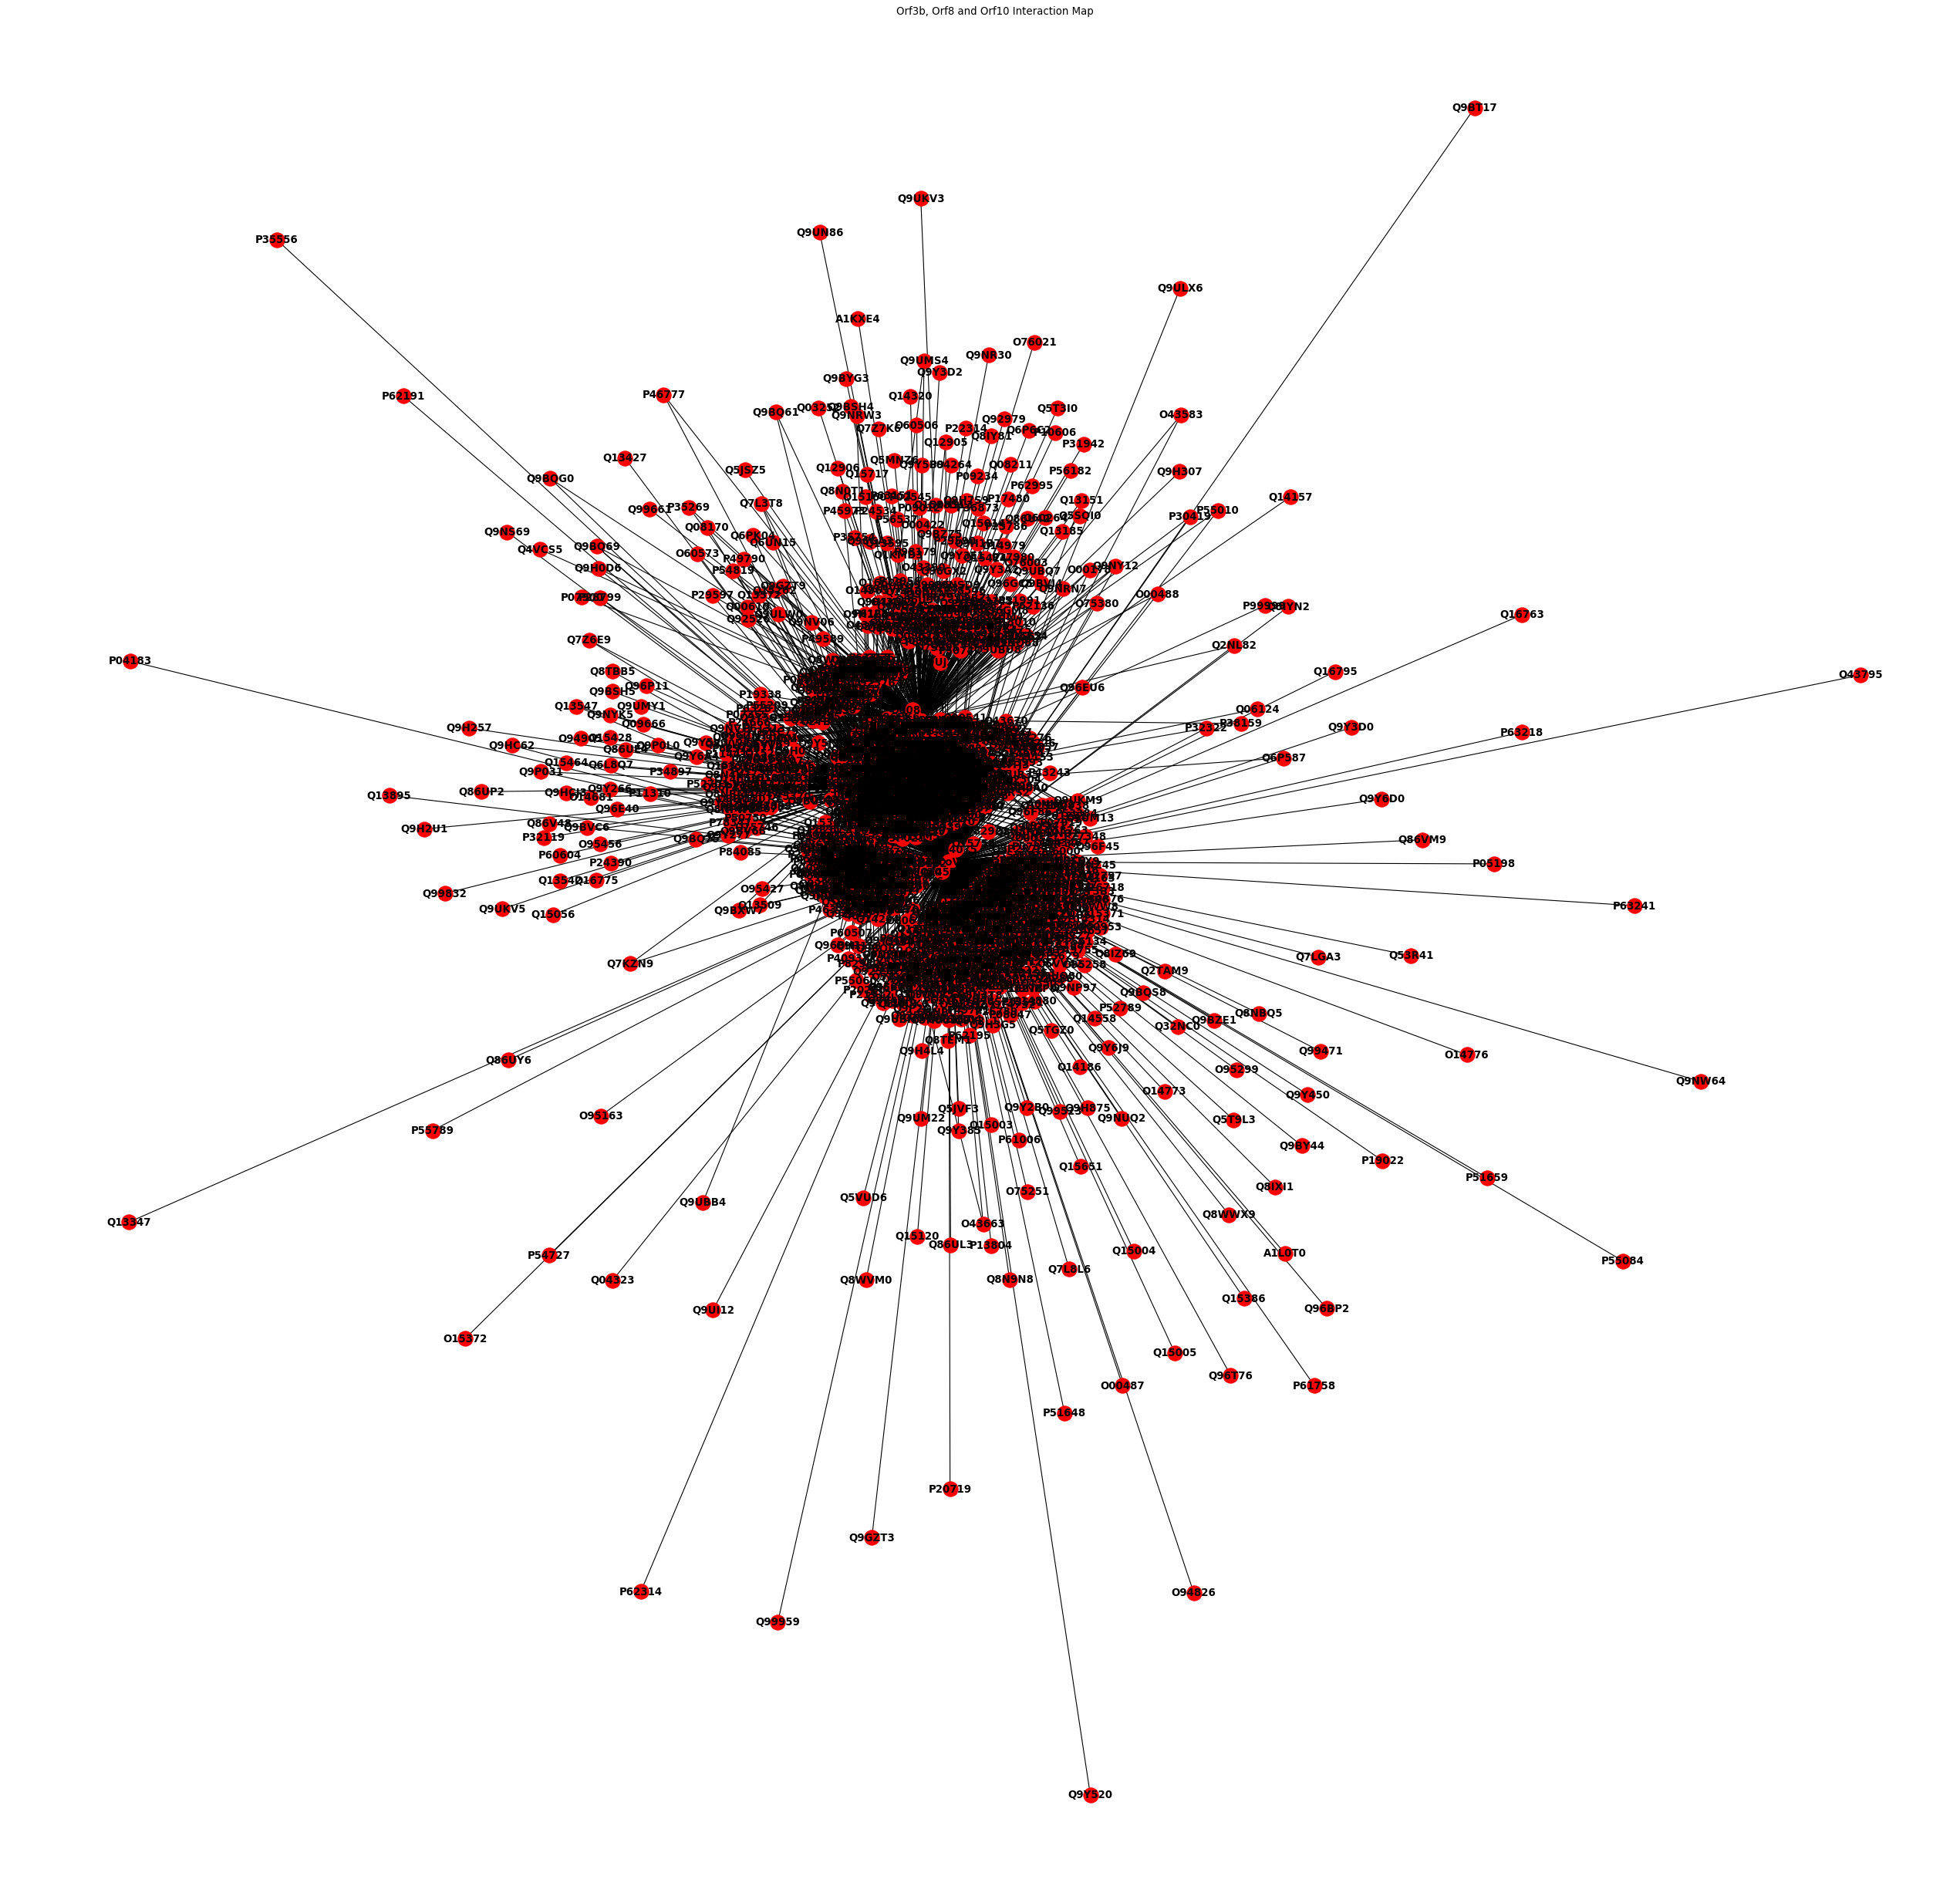

In [7]:
#print network for visualization
fig = figure(num=None, figsize=(40, 40), dpi=80, facecolor='w', edgecolor='k')
limits = plt.axis('off')
nx.draw_networkx(combined_graph, pos=nx.drawing.layout.spring_layout(combined_graph), font_weight='bold')
plt.title('Orf3b, Orf8 and Orf10 Interaction Map')
fig.savefig('./combined interactions.png', bbox='tight')